In [12]:
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

import math

import cv2
import numpy as np
import scipy
from scipy import ndimage, spatial

import transformations


def inbounds(shape, indices):
    assert len(shape) == len(indices)
    for i, ind in enumerate(indices):
        if ind < 0 or ind >= shape[i]:
            return False
    return True

In [63]:
## Keypoint detectors ##########################################################

class KeypointDetector(object):
    def detectKeypoints(self, image):
        '''
        Input:
            image -- uint8 BGR image with values between [0, 255]
        Output:
            list of detected keypoints, fill the cv2.KeyPoint objects with the
            coordinates of the detected keypoints, the angle of the gradient
            (in degrees), the detector response (Harris score for Harris detector)
            and set the size to 10.
        '''
        raise NotImplementedError()

class DummyKeypointDetector(KeypointDetector):
    '''
    Compute silly example features. This doesn't do anything meaningful, but
    may be useful to use as an example.
    '''

    def detectKeypoints(self, image):
        '''
        Input:
            image -- uint8 BGR image with values between [0, 255]
        Output:
            list of detected keypoints, fill the cv2.KeyPoint objects with the
            coordinates of the detected keypoints, the angle of the gradient
            (in degrees), the detector response (Harris score for Harris detector)
            and set the size to 10.
        '''
        image = image.astype(np.float32)
        image /= 255.
        features = []
        height, width = image.shape[:2]

        for y in range(height):
            for x in range(width):
                r = image[y, x, 0]
                g = image[y, x, 1]
                b = image[y, x, 2]

                if int(255 * (r + g + b) + 0.5) % 100 == 1:
                    # If the pixel satisfies this meaningless criterion,
                    # make it a feature.

                    f = cv2.KeyPoint()
                    f.pt = (x, y)
                    # Dummy size
                    f.size = 10
                    f.angle = 0
                    f.response = 10

                    features.append(f)

        return features


class HarrisKeypointDetector(KeypointDetector):

    # Compute harris values of an image.
    def computeHarrisValues(self, srcImage):
        '''
        Input:
            srcImage -- Grayscale input image in a numpy array with
                        values in [0, 1]. The dimensions are (rows, cols).
        Output:
            harrisImage -- numpy array containing the Harris score at
                           each pixel.
            orientationImage -- numpy array containing the orientation of the
                                gradient at each pixel in degrees.
        '''
        height, width = srcImage.shape[:2]

        harrisImage = np.zeros(srcImage.shape[:2])
        orientationImage = np.zeros(srcImage.shape[:2])

        # TODO 1: Compute the harris corner strength for 'srcImage' at
        # each pixel and store in 'harrisImage'.  See the project page
        # for direction on how to do this. Also compute an orientation
        # for each pixel and store it in 'orientationImage.'

        print("Calculating Sobel")
        Ix = ndimage.filters.sobel(srcImage, 1)
        Iy = ndimage.filters.sobel(srcImage, 0)
        
        Ix2 = Ix**2
        Iy2 = Iy**2
        IxIy = Iy*Ix
                
        print("Convolving")
        harris1 = ndimage.filters.gaussian_filter(Ix2, 0.5, truncate=3, mode='constant', cval=0)
        harris2 = ndimage.filters.gaussian_filter(Iy2, 0.5, truncate=3, mode='constant', cval=0)
        harris3 = ndimage.filters.gaussian_filter(IxIy, 0.5, truncate=3, mode='constant', cval=0)
        
        fig = plt.figure(figsize=(10,5))
        plt.imshow(harris1, cmap='gray')
        plt.show()

        print("Calculating Harris")
        for i in range(height):
            for j in range(width):
                H = [[harris1[i][j], harris3[i][j]], [harris3[i][j],harris2[i][j]]]
                harrisImage[i][j] = np.linalg.det(H) - 0.1 * (np.trace(H))**2

        print("Calculating Orientation")
        ## TODO: Using gaussian smoothed version?
        orientationImage = np.rad2deg(np.arctan2(Iy,Ix))

        return harrisImage, orientationImage

    def computeLocalMaxima(self, harrisImage):
        '''
        Input:
            harrisImage -- numpy array containing the Harris score at
                           each pixel.
        Output:
            destImage -- numpy array containing True/False at
                         each pixel, depending on whether
                         the pixel value is the local maxima in
                         its 7x7 neighborhood.
        '''
    
        destImage = np.zeros_like(harrisImage, np.bool)
        height, width = destImage.shape[:2]
        destImage = (harrisImage != ndimage.maximum_filter(harrisImage,7))

        return destImage

    def detectKeypoints(self, image):
        '''
        Input:
            image -- BGR image with values between [0, 255]
        Output:
            list of detected keypoints, fill the cv2.KeyPoint objects with the
            coordinates of the detected keypoints, the angle of the gradient
            (in degrees), the detector response (Harris score for Harris detector)
            and set the size to 10.
        '''
        image = image.astype(np.float32)
        image /= 255.
        height, width = image.shape[:2]
        features = []

        # Create grayscale image used for Harris detection
        grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # computeHarrisValues() computes the harris score at each pixel
        # position, storing the result in harrisImage.
        # You will need to implement this function.
        harrisImage, orientationImage = self.computeHarrisValues(grayImage)

        # Compute local maxima in the Harris image.  You will need to
        # implement this function. Create image to store local maximum harris
        # values as True, other pixels False
        harrisMaxImage = self.computeLocalMaxima(harrisImage)

        # Loop through feature points in harrisMaxImage and fill in information
        # needed for descriptor computation for each point.
        # You need to fill x, y, and angle.
        for y in range(height):
            for x in range(width):
                if not harrisMaxImage[y, x]:
                    continue

                f = cv2.KeyPoint()

                # TODO 3: Fill in feature f with location and orientation
                # data here. Set f.size to 10, f.pt to the (x,y) coordinate,
                # f.angle to the orientation in degrees and f.response to
                # the Harris score
                # TODO-BLOCK-BEGIN
                raise Exception("TODO in features.py not implemented")
                # TODO-BLOCK-END

                features.append(f)

        return features


class ORBKeypointDetector(KeypointDetector):
    def detectKeypoints(self, image):
        '''
        Input:
            image -- uint8 BGR image with values between [0, 255]
        Output:
            list of detected keypoints, fill the cv2.KeyPoint objects with the
            coordinates of the detected keypoints, the angle of the gradient
            (in degrees) and set the size to 10.
        '''
        detector = cv2.ORB()
        return detector.detect(image)



Calculating Sobel
Convolving


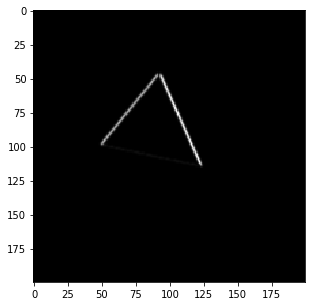

Calculating Harris
Calculating Orientation


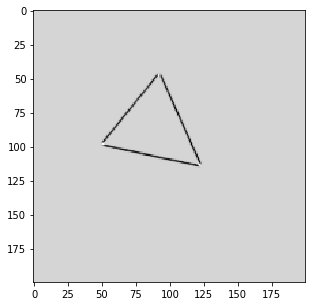

In [64]:
image = np.array(Image.open('resources/triangle1.jpg'))
grayImage = cv2.cvtColor(image.astype(np.float32)/255.0, cv2.COLOR_BGR2GRAY)

A = HarrisKeypointDetector()
h, o= A.computeHarrisValues(grayImage)

fig = plt.figure(figsize=(10,5))
plt.imshow(h, cmap='gray')
plt.show()

In [ ]:

## Feature descriptors #########################################################


class FeatureDescriptor(object):
    # Implement in child classes
    def describeFeatures(self, image, keypoints):
        '''
        Input:
            image -- BGR image with values between [0, 255]
            keypoints -- the detected features, we have to compute the feature
            descriptors at the specified coordinates
        Output:
            Descriptor numpy array, dimensions:
                keypoint number x feature descriptor dimension
        '''
        raise NotImplementedError


class SimpleFeatureDescriptor(FeatureDescriptor):
    # TODO: Implement parts of this function
    def describeFeatures(self, image, keypoints):
        '''
        Input:
            image -- BGR image with values between [0, 255]
            keypoints -- the detected features, we have to compute the feature
                         descriptors at the specified coordinates
        Output:
            desc -- K x 25 numpy array, where K is the number of keypoints
        '''
        image = image.astype(np.float32)
        image /= 255.
        grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        desc = np.zeros((len(keypoints), 5 * 5))

        for i, f in enumerate(keypoints):
            x, y = f.pt

            # TODO 4: The simple descriptor is a 5x5 window of intensities
            # sampled centered on the feature point. Store the descriptor
            # as a row-major vector. Treat pixels outside the image as zero.
            # TODO-BLOCK-BEGIN
            raise Exception("TODO in features.py not implemented")
            # TODO-BLOCK-END

        return desc


class MOPSFeatureDescriptor(FeatureDescriptor):
    # TODO: Implement parts of this function
    def describeFeatures(self, image, keypoints):
        '''
        Input:
            image -- BGR image with values between [0, 255]
            keypoints -- the detected features, we have to compute the feature
            descriptors at the specified coordinates
        Output:
            desc -- K x W^2 numpy array, where K is the number of keypoints
                    and W is the window size
        '''
        image = image.astype(np.float32)
        image /= 255.
        # This image represents the window around the feature you need to
        # compute to store as the feature descriptor (row-major)
        windowSize = 8
        desc = np.zeros((len(keypoints), windowSize * windowSize))
        grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        grayImage = ndimage.gaussian_filter(grayImage, 0.5)

        for i, f in enumerate(keypoints):
            # TODO 5: Compute the transform as described by the feature
            # location/orientation. You will need to compute the transform
            # from each pixel in the 40x40 rotated window surrounding
            # the feature to the appropriate pixels in the 8x8 feature
            # descriptor image.
            transMx = np.zeros((2, 3))

            # TODO-BLOCK-BEGIN
            raise Exception("TODO in features.py not implemented")
            # TODO-BLOCK-END

            # Call the warp affine function to do the mapping
            # It expects a 2x3 matrix
            destImage = cv2.warpAffine(grayImage, transMx,
                (windowSize, windowSize), flags=cv2.INTER_LINEAR)

            # TODO 6: Normalize the descriptor to have zero mean and unit
            # variance. If the variance is zero then set the descriptor
            # vector to zero. Lastly, write the vector to desc.
            # TODO-BLOCK-BEGIN
            raise Exception("TODO in features.py not implemented")
            # TODO-BLOCK-END

        return desc


class ORBFeatureDescriptor(KeypointDetector):
    def describeFeatures(self, image, keypoints):
        '''
        Input:
            image -- BGR image with values between [0, 255]
            keypoints -- the detected features, we have to compute the feature
            descriptors at the specified coordinates
        Output:
            Descriptor numpy array, dimensions:
                keypoint number x feature descriptor dimension
        '''
        descriptor = cv2.ORB()
        kps, desc = descriptor.compute(image, keypoints)
        if desc is None:
            desc = np.zeros((0, 128))

        return desc


# Compute Custom descriptors (extra credit)
class CustomFeatureDescriptor(FeatureDescriptor):
    def describeFeatures(self, image, keypoints):
        '''
        Input:
            image -- BGR image with values between [0, 255]
            keypoints -- the detected features, we have to compute the feature
            descriptors at the specified coordinates
        Output:
            Descriptor numpy array, dimensions:
                keypoint number x feature descriptor dimension
        '''
        raise NotImplementedError('NOT IMPLEMENTED')


## Feature matchers ############################################################


class FeatureMatcher(object):
    def matchFeatures(self, desc1, desc2):
        '''
        Input:
            desc1 -- the feature descriptors of image 1 stored in a numpy array,
                dimensions: rows (number of key points) x
                columns (dimension of the feature descriptor)
            desc2 -- the feature descriptors of image 2 stored in a numpy array,
                dimensions: rows (number of key points) x
                columns (dimension of the feature descriptor)
        Output:
            features matches: a list of cv2.DMatch objects
                How to set attributes:
                    queryIdx: The index of the feature in the first image
                    trainIdx: The index of the feature in the second image
                    distance: The distance between the two features
        '''
        raise NotImplementedError

    # Evaluate a match using a ground truth homography.  This computes the
    # average SSD distance between the matched feature points and
    # the actual transformed positions.
    @staticmethod
    def evaluateMatch(features1, features2, matches, h):
        d = 0
        n = 0

        for m in matches:
            id1 = m.queryIdx
            id2 = m.trainIdx
            ptOld = np.array(features2[id2].pt)
            ptNew = FeatureMatcher.applyHomography(features1[id1].pt, h)

            # Euclidean distance
            d += np.linalg.norm(ptNew - ptOld)
            n += 1

        return d / n if n != 0 else 0

    # Transform point by homography.
    @staticmethod
    def applyHomography(pt, h):
        x, y = pt
        d = h[6]*x + h[7]*y + h[8]

        return np.array([(h[0]*x + h[1]*y + h[2]) / d,
            (h[3]*x + h[4]*y + h[5]) / d])


class SSDFeatureMatcher(FeatureMatcher):
    def matchFeatures(self, desc1, desc2):
        '''
        Input:
            desc1 -- the feature descriptors of image 1 stored in a numpy array,
                dimensions: rows (number of key points) x
                columns (dimension of the feature descriptor)
            desc2 -- the feature descriptors of image 2 stored in a numpy array,
                dimensions: rows (number of key points) x
                columns (dimension of the feature descriptor)
        Output:
            features matches: a list of cv2.DMatch objects
                How to set attributes:
                    queryIdx: The index of the feature in the first image
                    trainIdx: The index of the feature in the second image
                    distance: The distance between the two features
        '''
        matches = []
        # feature count = n
        assert desc1.ndim == 2
        # feature count = m
        assert desc2.ndim == 2
        # the two features should have the type
        assert desc1.shape[1] == desc2.shape[1]

        if desc1.shape[0] == 0 or desc2.shape[0] == 0:
            return []

        # TODO 7: Perform simple feature matching.  This uses the SSD
        # distance between two feature vectors, and matches a feature in
        # the first image with the closest feature in the second image.
        # Note: multiple features from the first image may match the same
        # feature in the second image.
        # TODO-BLOCK-BEGIN
        raise Exception("TODO in features.py not implemented")
        # TODO-BLOCK-END

        return matches


class RatioFeatureMatcher(FeatureMatcher):
    def matchFeatures(self, desc1, desc2):
        '''
        Input:
            desc1 -- the feature descriptors of image 1 stored in a numpy array,
                dimensions: rows (number of key points) x
                columns (dimension of the feature descriptor)
            desc2 -- the feature descriptors of image 2 stored in a numpy array,
                dimensions: rows (number of key points) x
                columns (dimension of the feature descriptor)
        Output:
            features matches: a list of cv2.DMatch objects
                How to set attributes:
                    queryIdx: The index of the feature in the first image
                    trainIdx: The index of the feature in the second image
                    distance: The ratio test score
        '''
        matches = []
        # feature count = n
        assert desc1.ndim == 2
        # feature count = m
        assert desc2.ndim == 2
        # the two features should have the type
        assert desc1.shape[1] == desc2.shape[1]

        if desc1.shape[0] == 0 or desc2.shape[0] == 0:
            return []

        # TODO 8: Perform ratio feature matching.
        # This uses the ratio of the SSD distance of the two best matches
        # and matches a feature in the first image with the closest feature in the
        # second image.
        # Note: multiple features from the first image may match the same
        # feature in the second image.
        # You don't need to threshold matches in this function
        # TODO-BLOCK-BEGIN
        raise Exception("TODO in features.py not implemented")
        # TODO-BLOCK-END

        return matches


class ORBFeatureMatcher(FeatureMatcher):
    def __init__(self):
        self.bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        super(ORBFeatureMatcher, self).__init__()

    def matchFeatures(self, desc1, desc2):
        return self.bf.match(desc1.astype(np.uint8), desc2.astype(np.uint8))
